In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Add exogenous variables

To detect anomalies with exogenous variables, load a dataset with the exogenous features as columns. Use the same `detect_anomalies` method and plot the weights of each feature using `weight_x.plot()`.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/capabilities/anomaly-detection/02_anomaly_exogenous')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/capabilities/anomaly-detection/02_anomaly_exogenous.ipynb)

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

> 👍 Use an Azure AI endpoint
> 
> To use an Azure AI endpoint, set the `base_url` argument:
> 
> `nixtla_client = NixtlaClient(base_url="you azure ai endpoint", api_key="your api_key")`

In [ ]:
#| hide
if not IN_COLAB:
    from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()
nixtla_client = NixtlaClient()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using the following exogenous features: ['Exogenous1', 'Exogenous2', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6']
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


<Axes: ylabel='features'>

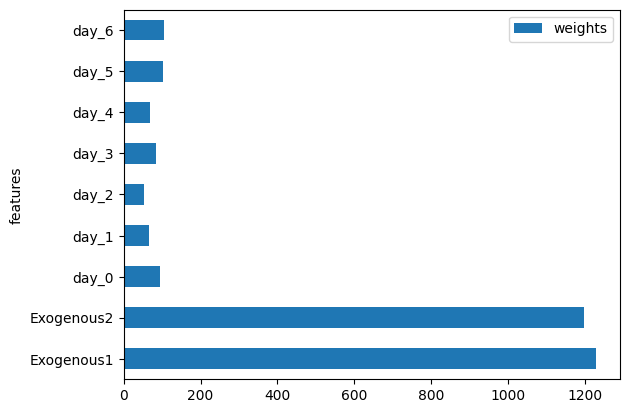

In [ ]:
# Read the dataset
# The dataset has exogenous features in its columns
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short-with-ex-vars.csv')

# Detect anomalies
anomalies_df = nixtla_client.detect_anomalies(
    df=df,
    time_col='ds',
    target_col='y'
)

# Plot weight of exgeonous features
nixtla_client.weights_x.plot.barh(x='features', y='weights')

> 📘 Available models in Azure AI
>
> If you use an Azure AI endpoint, set `model="azureai"`
>
> `nixtla_client.detect_anomalies(..., model="azureai")`
> 
> For the public API, two models are supported: `timegpt-1` and `timegpt-1-long-horizon`.
> 
> By default, `timegpt-1` is used. See [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) for details on using `timegpt-1-long-horizon`.

Read our detailed guide on [anomaly detection](https://docs.nixtla.io/docs/tutorials/anomaly_detection) for more information.